# Tugas Kecil 2 Strategi Algoritma
NIM: 13520153

Nama: Vito Ghifari

## Convex Hull dari Referensi

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
data = datasets.load_iris()
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

[41 13]
[36 41]
[22 13]
[22 32]
[15 14]
[15 32]
[18 14]
[18 36]
----
[35  0]
[34  7]
[34 35]
[10  7]
[10 18]
[26  0]
[26 18]
----
[19  6]
[18 31]
[18 19]
[48  6]
[17 31]
[17 48]
----


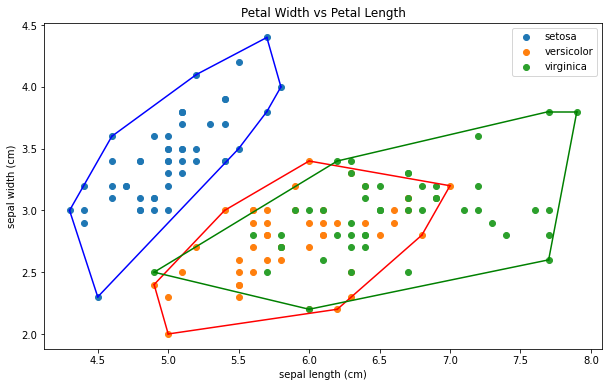

In [3]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi 
    # ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
        print(simplex)
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    print("----")
plt.legend()

# myConvexHull

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets

In [5]:
# Data iris
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

# Data wine
data_wine = datasets.load_wine()
df_wine = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
df_wine['Target'] = pd.DataFrame(data_wine.target)

# data breast cancer
data_cancer = datasets.load_breast_cancer()
df_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
df_cancer['Target'] = pd.DataFrame(data_cancer.target)

Determinan untuk memeriksa apakah suatu garis terletak di atas/di kiri suatu garis atau di bawah/di kanan garis tersebut:
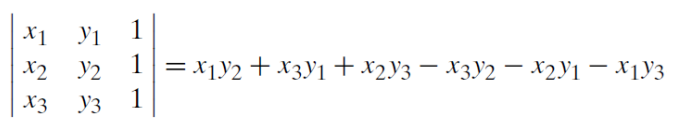
Digunakan pada fungsi $det(x_1, y_1, x_2, y_2, x_{test}, y_{test})$

Rumus jarak dari titik ke garis:

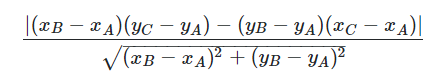
Digunakan pada fungsi $distance(x_1, y_1, x_2, y_2, x_{test}, y_{test})$

In [6]:
class myConvexHull:
    def __init__(self, frame: pd.DataFrame, col_x: str = None, col_y: str = None):
        self.frame = frame
        self.col_x = col_x
        self.col_y = col_y
        self.simplices = self.solveConvexHull(frame, col_x, col_y) 
        
    def det(self, x_1: float, y_1: float, x_2: float, y_2: float, x_test: float, y_test: float) -> float:
        """
        Menghitung determinan dari titik (x_test, y_test) terhadap garis 
        yang dihubungkan dengan titik (x_1, y_1) dan (x_2, y_2)

        Args:
            x_1: absis titik kedua yang dilewati garis
            y_1: ordinat titik pertama yang dilewati garis
            x_1: absis titik kedua yang dilewati garis
            y_1: ordinat titik kedua yang dilewati garis
            x_test: absis titik yang akan dites
            y_test: ordinat titik yang akan dites

        Returns:
            Hasil determinan dengan tipe data float. 
                Jika hasilnya positif, titik terdapat di atas garis.
                Jika hasilnya nol, titik terdapat pada garis
                Jika hasilnya negarif, titik terdapat di bawah garis.

        """
        return x_1*y_2 + x_test*y_1 + x_2*y_test - x_test*y_2 - x_2*y_1 - x_1*y_test
    
    def distance(self, x_1: float, y_1: float, x_2: float, y_2:float, x_test: float, y_test: float) -> float:
        """"
        Menghitung jarak titik (x_test, y_test) dari garis yang dihubungkan titik (x_1, y_1) dan (x_2, y_2).

        Args:
            x_1: absis titik kedua yang dilewati garis
            y_1: ordinat titik pertama yang dilewati garis
            x_1: absis titik kedua yang dilewati garis
            y_1: ordinat titik kedua yang dilewati garis
            x_test: absis titik yang akan dites
            y_test: ordinat titik yang akan dites

        Returns:
            Jarak titik (x_test, y_test) terhadap garis yang dihubungkan titik (x_1, y_1) dan (x_2, y_2).
        """
        return abs((x_2-x_1)*(y_test-y_1) - (y_2-y_1)*(x_test-x_1))/((x_2-x_1)**2 + (y_2-y_1)**2)**(1/2)
        
    def dnc_convexhull(self, frame: pd.DataFrame, p_min: int, p_n: int, includes: list, up=True) -> list:
        """
        Implementasi algoritma divide and conquer pada convex hull. 
        Menerima dataframe yang terdiria atas 2 kolom. Kolom pertama sebagai absis dan kolom kedua sebagai ordinat.
        Mengembalikan kumpulan dua titik yang dihubungkan garis convex hull.
        
        Args:
            frame: DataFrame yang digunakan
            p_min: index dari titik pada frame dengan absis lebih kecil yang membentuk garis convex hull
            p_n: index dari titik pada frame dengan absis lebih besar yang membentuk garis convex hull
            col_x: kolom yang digunakan sebagai absis
            col_y: kolom yang digunakan sebagai absis
        Returns:
            List berisi dua titik sebagai garis convex hull, yang berada dalam list. 
        """
        if len(includes) == 0:
            # Tidak ada titik antara p_min dan p_n, artinya titik p_min dan p_n membentuk garis convex hull
            return [[p_min, p_n]]
        elif len(includes) == 1:
            # Hanya ada 1 titik antara p_min dan p_n, artinya garis convex hull antara p_min dan p_n
            # dihubungkan oleh titik tersebut
            return [[p_min, includes[0]], [includes[0], p_n]]

        # Mengeluarkan p_min dan p_n jika masuk ke includes
        inc_list = list(set(includes) - {p_min, p_n})

        # kolom x dan y
        col_x = frame.columns[0]
        col_y = frame.columns[1]

        x_pmin = frame.loc[p_min][col_x]
        y_pmin = frame.loc[p_min][col_y]

        x_pn = frame.loc[p_n][col_x]
        y_pn = frame.loc[p_n][col_y]

        # Menghitung jarak maksimal titik dari titik p_min dan p_n
        p_max = self.distance(x_pmin, y_pmin, x_pn, y_pn, frame.loc[inc_list][col_x], frame.loc[inc_list][col_y]).idxmax()
        x_pmax = frame.loc[p_max][col_x]
        y_pmax = frame.loc[p_max][col_y]

        inc_list = list(set(inc_list) - {p_max})

        # Mencari semua titik pada area S1 dan S2
        S1 = []
        S2 = []
        for i, row in frame[[col_x, col_y]].loc[inc_list].iterrows():
            if (x_pmin < x_pn):
                indicator_1 = self.det(x_pmin, y_pmin, x_pmax, y_pmax, row[col_x], row[col_y])
            else:
                indicator_1 = self.det(x_pmax, y_pmax, x_pmin, y_pmin, row[col_x], row[col_y])
            if (x_pn < x_pmax):
                indicator_2 = self.det(x_pn, y_pn, x_pmax, y_pmax, row[col_x], row[col_y])
            else:
                indicator_2 = self.det(x_pmax, y_pmax, x_pn, y_pn, row[col_x], row[col_y])

            if up:
                if indicator_1 > 0:
                    S1.append(i)
                if indicator_2 > 0:
                    S2.append(i)
            else: 
                if indicator_1 < 0:
                    S1.append(i)
                if indicator_2 < 0:
                    S2.append(i)

        res_S1 = self.dnc_convexhull(frame, p_min, p_max, S1, up=up)
        res_S2 = self.dnc_convexhull(frame, p_max, p_n, S2, up=up)

        return res_S1 + res_S2


    def solveConvexHull(self, frame: pd.DataFrame, col_x=None, col_y=None):
        """
        Eksekusi pembentukan convex hull dengan algoritma divide and conquer.
        
        Args:
            frame: DataFrame yang digunakan
            col_x: kolom yang digunakan sebagai absis
            col_y: kolom yang digunakan sebagai ordinat
        Returns:
            List berisi dua titik sebagai garis convex hull, yang berada dalam list. 
        """
        if len(frame.columns) < 2:
            raise Exception("Jumlah kolom kurang dari 2")

        if col_x is None:
            col_x = frame.columns[0]
        if col_y is None:
            col_y = frame.columns[1]
            


        # Mencari titik dengan absis terkecil
        min_data = frame[frame[col_x] == frame[col_x].min()]
        min_x = list(min_data[col_x])[0]
        min_y = list(min_data[col_y])[0]

        # Mencari titik dengan absis terbesar
        max_data = frame[frame[col_x] == frame[col_x].max()]
        max_x = list(max_data[col_x])[0]
        max_y = list(max_data[col_y])[0]
        
        # Menghilangkan index min-data dan max_data pada pencarian titik  
        includes = list(set(frame.index) - {max_data.index[0], min_data.index[0]})
        
        # Membagi area dengan S1 dan S2
        S1 = []
        S2 = []
        for i, row in frame.loc[includes].iterrows():
            res = self.det(min_x, min_y, max_x, max_y, row[col_x], row[col_y])
            if res > 0:
                S1.append(i)
            elif res < 0:
                S2.append(i)
                
        res_S1 = self.dnc_convexhull(frame[[col_x, col_y]], min_data.index[0], max_data.index[0], S1)
        res_S2 = self.dnc_convexhull(frame[[col_x, col_y]], min_data.index[0], max_data.index[0], S2, up=False)
        return res_S1 + res_S2

[13, 22]
[22, 32]
[32, 15]
[15, 14]
[13, 41]
[41, 36]
[36, 18]
[18, 14]
----
[57, 84]
[84, 85]
[85, 50]
[57, 60]
[60, 68]
[68, 76]
[76, 50]
----
[106, 148]
[148, 117]
[117, 131]
[106, 119]
[119, 118]
[118, 131]
----


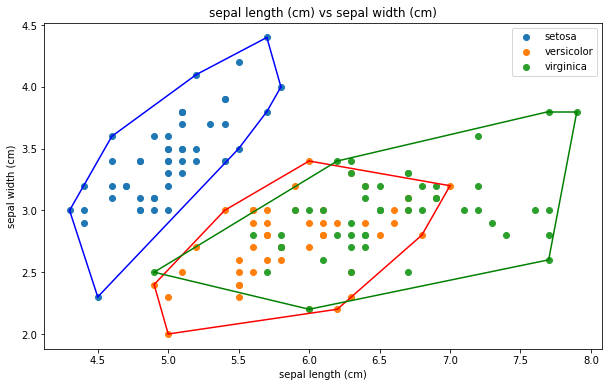

In [7]:
# Template untuk melakukan input dataframe menjadi visualisasi
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
feature_0 = data.feature_names[0]
feature_1 = data.feature_names[1]
plt.title(feature_0 + " vs " + feature_1)
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    hull = myConvexHull(bucket, feature_0, feature_1)
    # ConvexHull Divide & Conquer
    plt.scatter(bucket.loc[:, feature_0], bucket.loc[:, feature_1], label=data.target_names[i])
    for simplex in hull.simplices:
        print(simplex)
        plt.plot(bucket.loc[simplex, feature_0], bucket.loc[simplex, feature_1], colors[i])
    print("----")
plt.legend()

[1, 39]
[39, 33]
[33, 25]
[1, 13]
[13, 12]
[12, 41]
[41, 30]
[30, 25]
----
[59, 78]
[78, 69]
[69, 95]
[95, 73]
[59, 66]
[66, 89]
[89, 127]
[127, 73]
----
[134, 130]
[130, 150]
[150, 152]
[152, 157]
[134, 146]
[146, 157]
----


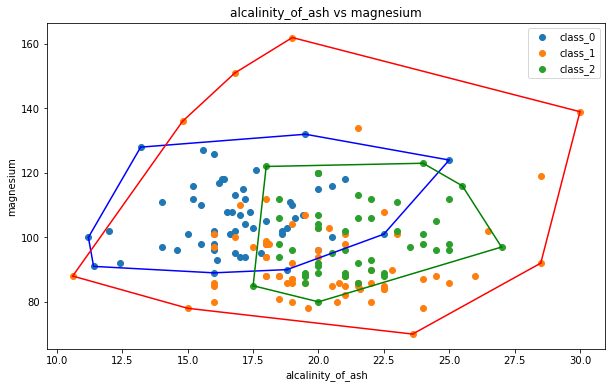

In [8]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.xlabel(data_wine.feature_names[3])
plt.ylabel(data_wine.feature_names[4])
feature_0 = data_wine.feature_names[3]
feature_1 = data_wine.feature_names[4]
plt.title(feature_0 + " vs " + feature_1)
for i in range(len(data_wine.target_names)):
    bucket = df_wine[df_wine['Target'] == i]
    hull = myConvexHull(bucket, feature_0, feature_1)
    # ConvexHull Divide & Conquer
    plt.scatter(bucket.loc[:, feature_0], bucket.loc[:, feature_1], label=data_wine.target_names[i])
    for simplex in hull.simplices:
        print(simplex)
        plt.plot(bucket.loc[simplex, feature_0], bucket.loc[simplex, feature_1], colors[i])
    print("----")
plt.legend()